## Importing required Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import matplotlib.font_manager

In [3]:
plt.rcParams.update({'font.family':'sans-serif','font.size':14})

## Importing Data and Preprocessing

In [4]:
df = pd.read_csv('data/Mercadolibre18-21-en.csv')
df.head()

,Year,Date,Platform,Region,Department,Municipality,Transport,Category,Products,Quantity,Discount,Sale,Profit
0,Eighteen,2/01/2018,MercadoLibre,Amazonia,Vaupes,Yavarate,Envia-3,Industrial,Printers,1,0.0,937800.0,412632.00
1,Eighteen,3/01/2018,MercadoLibre,Pacifica,Valle del Cauca,Cali,Servientrega+3,Home appliances,Refrigerators,2,0.2,1915136.0,102952.80
2,Eighteen,3/01/2018,MercadoLibre,Andina,Bogota,Bogota DC,Envia+4,Industrial,Drones,3,0.0,1111880.0,103207.60
3,Eighteen,3/01/2018,MercadoLibre,Caribe,Atlantico,Galapa,Envia+4,Home appliances,Refrigerators,2,0.3,1568232.0,-34423.44
4,Eighteen,3/01/2018,MercadoLibre,Caribe,Atlantico,Galapa,Envia+4,Trade Equipment,Thermal paper,3,0.2,34944.0,11356.80


In [5]:
## Sales and profit are in units of Colombian pesos (COP)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9495 entries, 0 to 9494
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          9495 non-null   object 
 1   Date          9495 non-null   object 
 2   Platform      9495 non-null   object 
 3   Region        9495 non-null   object 
 4   Department    9495 non-null   object 
 5   Municipality  9495 non-null   object 
 6   Transport     9495 non-null   object 
 7   Category      9495 non-null   object 
 8   Products      9495 non-null   object 
 9   Quantity      9495 non-null   int64  
 10  Discount      9495 non-null   float64
 11  Sale          9495 non-null   float64
 12  Profit        9495 non-null   float64
dtypes: float64(3), int64(1), object(9)
memory usage: 964.5+ KB


In [7]:
df.isnull().sum()
## Null values not available in the dataset

Year            0
Date            0
Platform        0
Region          0
Department      0
Municipality    0
Transport       0
Category        0
Products        0
Quantity        0
Discount        0
Sale            0
Profit          0
dtype: int64

## Descriptive Statistics and Correlation

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Quantity,9495.0,3.784202,2.228774e+00,1.0,2.0,3.0,5.0,14.0
Discount,9495.0,0.163464,2.088725e-01,0.0,0.0,0.2,0.2,0.8
Sale,9495.0,457031.797852,1.243269e+06,888.0,34138.0,108768.0,419200.0,45276960.0
Profit,9495.0,80688.703191,3.795063e+05,-1319995.6,2956.8,16431.2,57412.8,16799952.0


In [9]:
df.describe(include=object).transpose()

,count,unique,top,freq
Year,9495,4,Twenty one,3120
Date,9495,1226,9/02/2021,36
Platform,9495,1,MercadoLibre,9495
Region,9495,5,Andina,5086
Department,9495,32,Antioquia,2001
Municipality,9495,271,Bogota DC,1126
Transport,9495,4,Envia+4,5680
Category,9495,3,Trade Equipment,5696
Products,9495,17,Shelving,1434


In [10]:
## The data corresponds to 4 years of sales on the Mercadolibre platform 
## Data covers all regions, departments and municipalities of Colombia
## Purchases are send in 4 different type of shipping mode 
## 17 sub-category of products across 3 main categories are in the data

In [11]:
corre = df.corr()
corre

,Quantity,Discount,Sale,Profit
Quantity,1.000000,0.011206,0.202120,0.118516
Discount,0.011206,1.000000,-0.027451,-0.135400
Sale,0.202120,-0.027451,1.000000,0.724658
Profit,0.118516,-0.135400,0.724658,1.000000


In [12]:
## Sales have moderate positive correaltion with profit
## Sales and profit have negative correlation with discount

<Figure size 864x864 with 0 Axes>

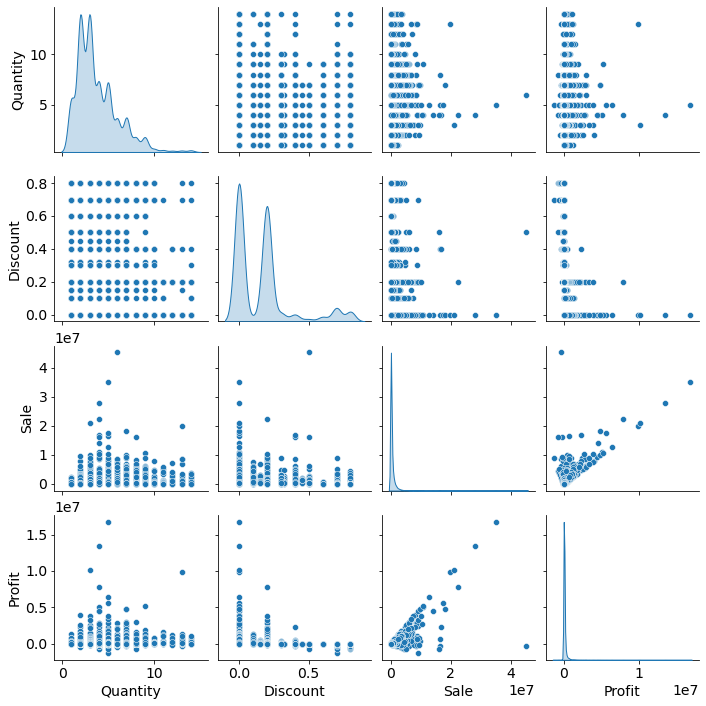

In [13]:
plt.figure(figsize=(12,12))
sns.pairplot(df,diag_kind='kde')
plt.show()

# Bivariate and Multi Variate Analysis

## Analysis based on Quantity sold

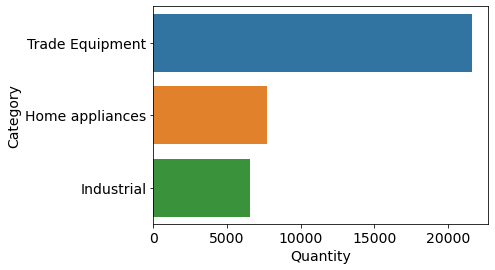

In [14]:
quant_cat = df.groupby(['Category']).Quantity.sum().sort_values(ascending=False)
sns.barplot(x=quant_cat,y=quant_cat.index)
plt.show()

In [15]:
## Trade Equipment has more 3x count of sales compared to others two categories individually

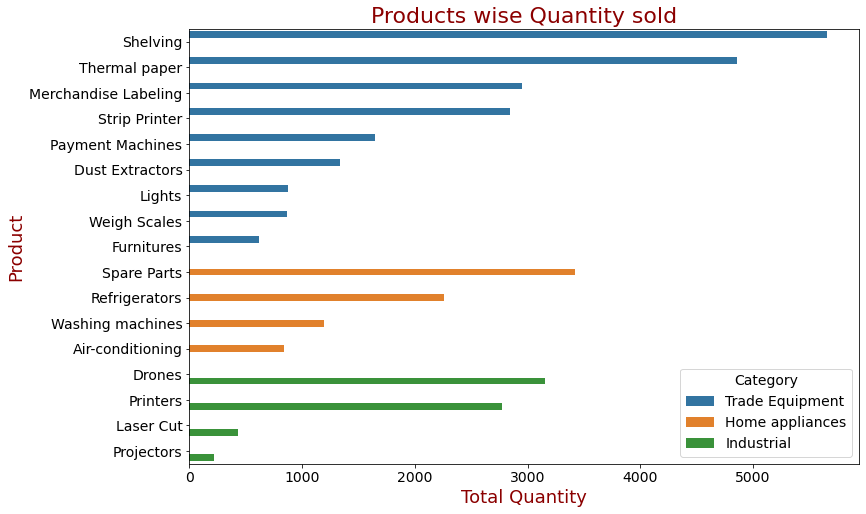

In [16]:
quant_cat_sub = df.groupby(['Category','Products']).Quantity.sum().reset_index().sort_values(by=['Category','Quantity'], ascending=[True,False], key=lambda x : x.replace({'Trade Equipment':1,'Home appliances':2,'Industrial':3}))
plt.figure(figsize=(12,8))
sns.barplot(data=quant_cat_sub,y='Products',x='Quantity',hue='Category')
plt.title('Products wise Quantity sold',fontdict={'fontsize':22,'family':'sans serif','color':'darkred'})
plt.xlabel('Total Quantity',fontdict={'fontsize':18,'family':'sans serif','color':'darkred'})
plt.ylabel('Product',fontdict={'fontsize':18,'family':'sans serif','color':'darkred'})
plt.show()

In [17]:
## From the above graph, we can see the quantity of items sold by product

## Top 2 sub categories as per quantity sold
## 1) Home appliances    - Spare Parts, Refrigerators
## 2) Trade Equipment    - Shelving, Thermal paper
## 3) Industrial         - Drones, Printers

## Discount !!!!

In [18]:
df_discount = df[df.Discount != 0]

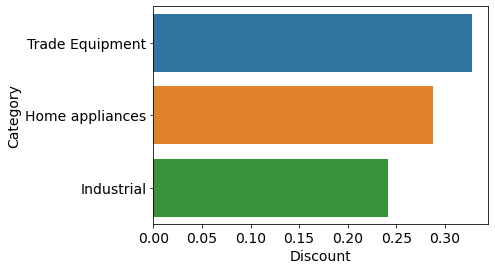

In [19]:
disc_cat = df_discount.groupby('Category')['Discount'].mean().sort_values(ascending=False)
sns.barplot(x=disc_cat,y=disc_cat.index)
plt.show()

In [20]:
## Average discount % is high for Trade Equipment products

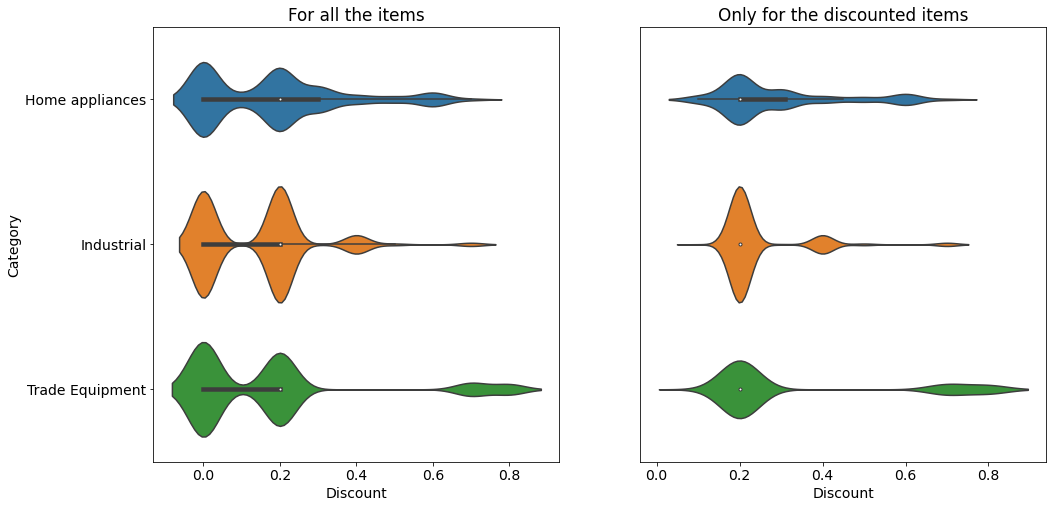

In [21]:
plt.figure(figsize=(16,8))
ax1, ax2 = plt.subplot(1,2,1), plt.subplot(1,2,2)

sns.violinplot(data=df.sort_values(by=['Category']),x='Discount',y='Category',inner='box',ax=ax1)
ax1.set_title('For all the items')
sns.violinplot(data=df_discount.sort_values(by=['Category']),x='Discount',y='Category',inner='box',ax=ax2,sharex=ax1)
ax2.set_title('Only for the discounted items')
ax2.set_yticks([])
ax2.set_ylabel('')

plt.show()

In [22]:
## --> for all the categories 
## 1) Purchases with 0 % discount are high
## 2) For the discounted purchases, median discount is 20%

## --> For Trade Equipment, we can see distribution at around 80% which is the max
## --> For Industrial, there are some items discounted at around 40%
## --> Home appliances have a wide range of discounts available

In [23]:
print(df.iloc[df_discount.Discount.idxmax()][['Category','Products','Quantity','Discount','Profit']])

Category    Trade Equipment
Products           Shelving
Quantity                  3
Discount                0.8
Profit              -2678.4
Name: 15, dtype: object


In [24]:
## The max discount of 80% was provided for a 5 items Trade Equipment purchase which resulted in a loss of $2678 COP

## Function Definition for plotting sales and profit against other features

In [25]:
def sales_profit(col,filter_col=None,filter_condition=None,n=5):
    
    if (filter_col == None) | (filter_condition == None):
        new_df = df
        a = ''
    else:
        new_df = df[df[filter_col]==filter_condition]
        a = 'In {} as {},'.format(filter_col,filter_condition)
        

    print('Sales Contribution by {}\n'.format(col))
    print(new_df[col].value_counts().head(10))
    
    fig = plt.figure(figsize=(16, 12))
    gs = fig.add_gridspec(nrows = 2, ncols = 4,  width_ratios=(2, 2, 2, 2), height_ratios=(2, 2),
                          left=0, right=0.9, bottom=0.1, top=0.9, wspace=0.8, hspace=0.2)
    font_title ={'fontsize':20,'family': 'sans-serif','color':  'darkred','weight': 'normal','size': 20}

    ax_pie = fig.add_subplot(gs[0, 1:3])
    
    Sale = (new_df.groupby(col).Sale.sum().sort_values(ascending=False)*100/new_df.Sale.sum())
    
    if len(Sale) > 10:
        sns.barplot(x=Sale.head(15),y=Sale.head(15).index,ax=ax_pie)
        ax_pie.set_title('{} \nTop 15 Revenue contributing {}'.format(a,col),fontdict=font_title)
    elif len(Sale) > 5:
        ax_pie.pie(Sale,autopct='%.2f%%',textprops={'fontsize':16,'color':'white'})
        ax_pie.set_title('{} \nRevenue contribution by {}'.format(a,col),fontdict=font_title)
        ax_pie.legend(bbox_to_anchor=(1,1))
    else:
        ax_pie.pie(Sale,autopct='%.2f%%',labels=Sale.index,textprops={'fontsize':16,'color':'white'})
        ax_pie.set_title('{} \nRevenue contribution by {}'.format(a,col),fontdict=font_title)
        ax_pie.legend(bbox_to_anchor=(1,1))
    

    ax_sales = fig.add_subplot(gs[1,:2])
    avg_sales = (new_df.groupby(col).Sale.mean().sort_values(ascending=False)).head(5)
    sns.barplot(x=avg_sales.values,y=avg_sales.index)
    ax_sales.set_title('Average Revenue per purchase by {}'.format(col),fontdict=font_title)
    ax_sales.set_xlabel('Revenue')

    ax_profit = fig.add_subplot(gs[1,2:])
    avg_profit = (new_df.groupby(col).Profit.mean().sort_values(ascending=False)).head(5)
    sns.barplot(x=avg_profit.values,y=avg_profit.index)
    ax_profit.set_title('Average Profit per purchase by {}'.format(col),fontdict=font_title)
    ax_profit.set_xlabel('Profit')
    ax_profit.set_ylabel('')

    plt.show()

## Which region of Colombia yields least sales and profit and why?

Sales Contribution by Region

Andina       5086
Caribe       1508
Orinoquia    1293
Pacifica     1040
Amazonia      568
Name: Region, dtype: int64


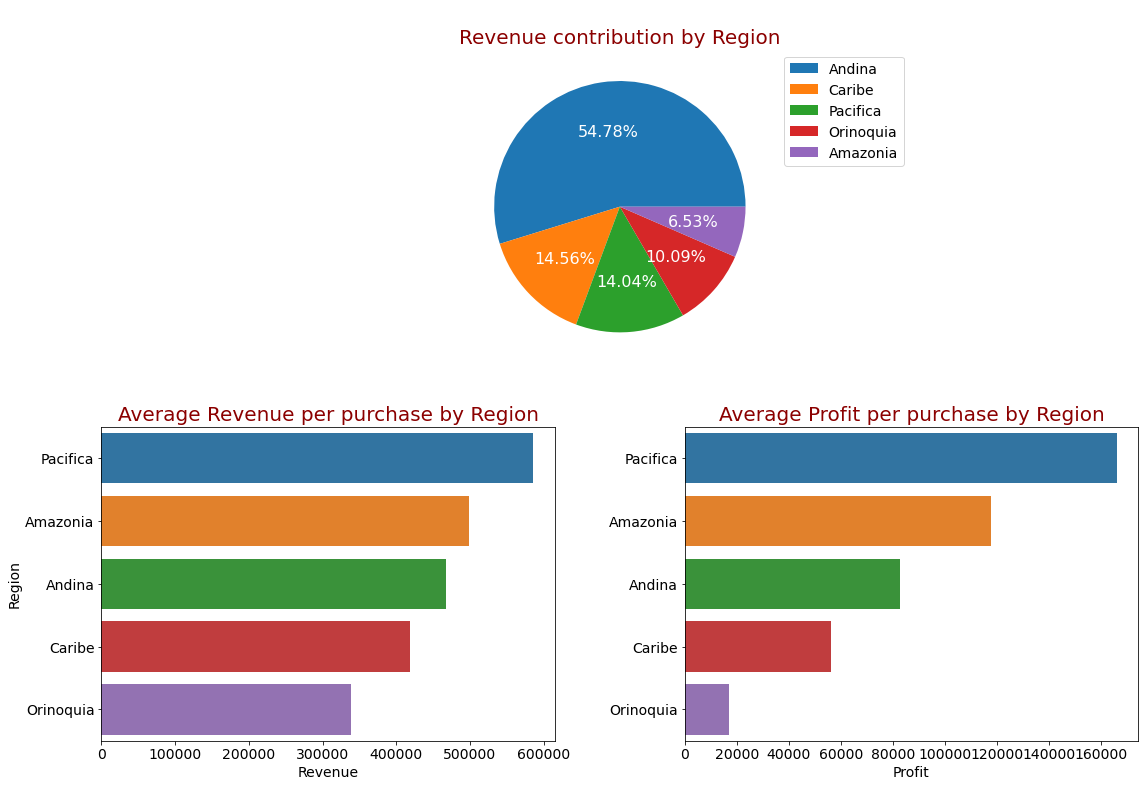

In [26]:
sales_profit(col='Region')

In [27]:
## Inference:
## 1) the Andina region contributes with more than 50% of the revenue
## 2) Orinoquia and Caribe regions produce significantly low average profit per purchase. Further research needs to be done

Sales Contribution by Category

Trade Equipment    790
Home appliances    264
Industrial         239
Name: Category, dtype: int64


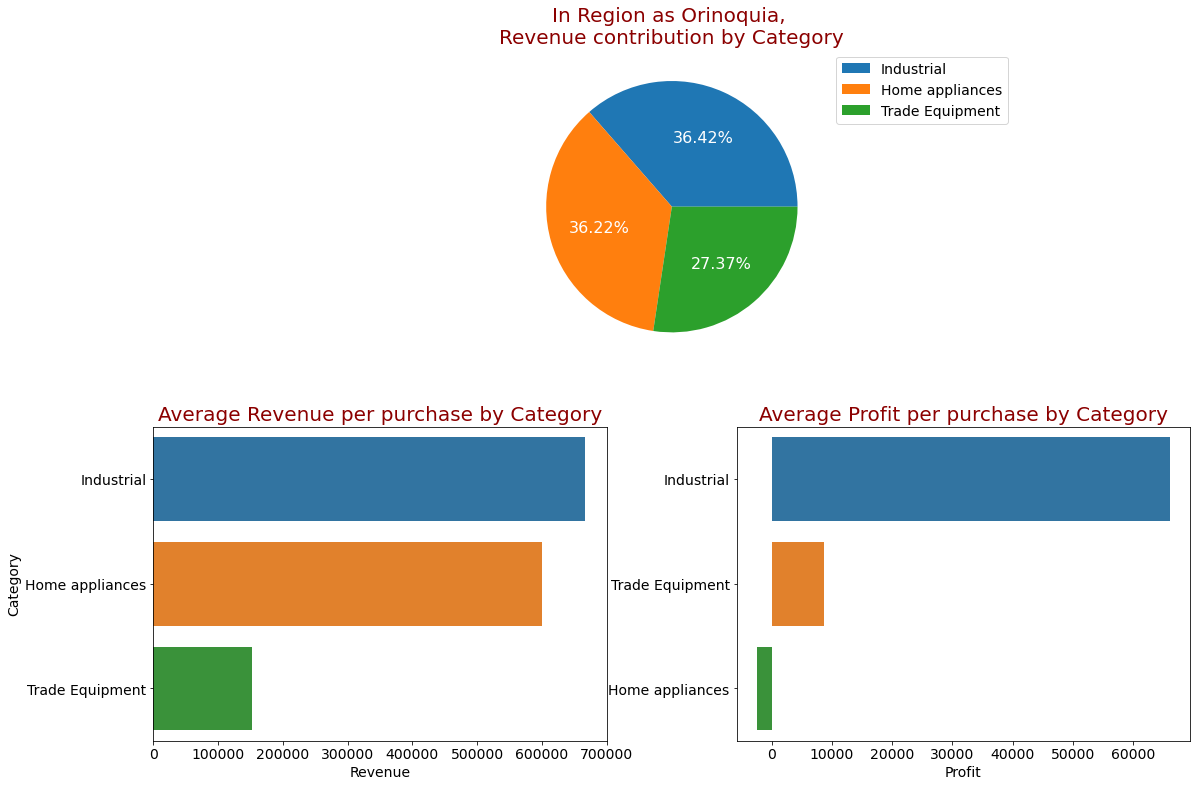

In [28]:
sales_profit(col='Category',filter_col='Region',filter_condition='Orinoquia')

In [29]:
##  Home appliances business contributing for 36% of the Orinoquia market share is in loss leading to significant drop 
##  in profit

## Department wise Analysis

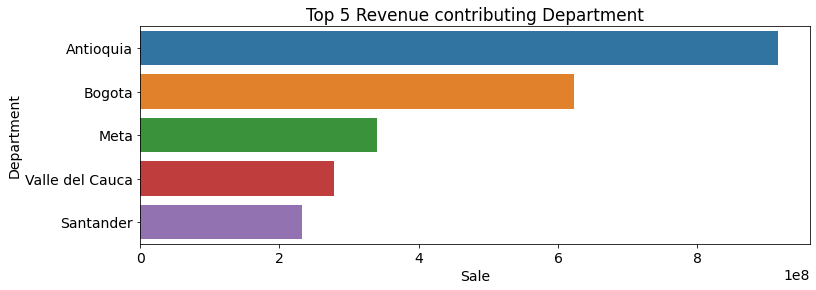

In [30]:
tot_sales_state = (df.groupby('Department').Sale.sum().sort_values(ascending=False))
plt.figure(figsize=(12,4))
sns.barplot(x=tot_sales_state.head(),y=tot_sales_state.head().index)
plt.title('Top 5 Revenue contributing Department')
plt.show()

## Which municipality yields high sales and profit?

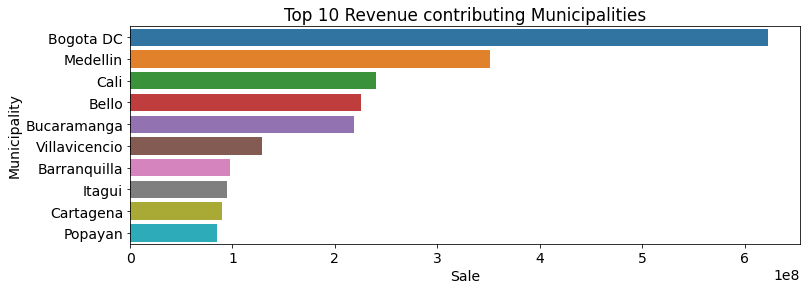

In [31]:
tot_sales_city = (df.groupby('Municipality').Sale.sum().sort_values(ascending=False))
plt.figure(figsize=(12,4))
sns.barplot(x=tot_sales_city.head(10),y=tot_sales_city.head(10).index)
plt.title('Top 10 Revenue contributing Municipalities')
plt.show()

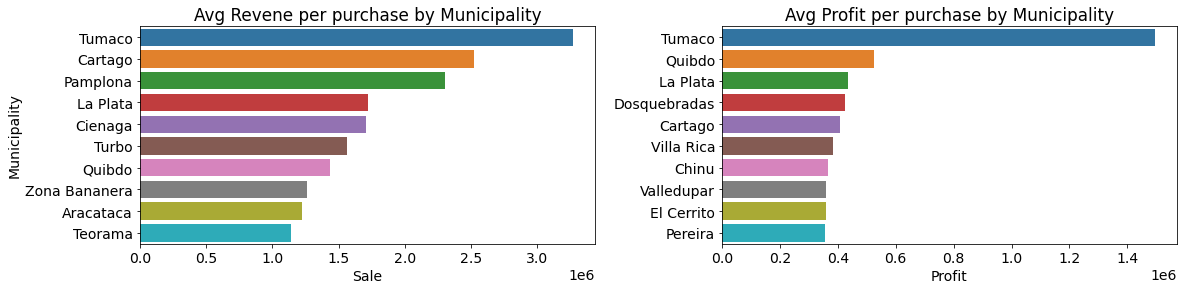

In [32]:
sales_city = (df.groupby('Municipality').Sale.mean().sort_values(ascending=False))
profit_city = (df.groupby('Municipality').Profit.mean().sort_values(ascending=False))

fig = plt.figure(figsize=(16, 4))
gs = fig.add_gridspec(nrows = 1, ncols = 2,  width_ratios=(2, 2),  left=0.05, right=0.95, wspace=0.28)

ax_rev = fig.add_subplot(gs[0, 0])
sns.barplot(x=sales_city.head(10),y=sales_city.head(10).index,ax=ax_rev)
ax_rev.set_title('Avg Revene per purchase by Municipality')

ax_pro = fig.add_subplot(gs[0, 1])
sns.barplot(x=profit_city.head(10),y=profit_city.head(10).index,ax=ax_pro)
ax_pro.set_title('Avg Profit per purchase by Municipality')
ax_pro.set_ylabel('')

plt.show()

In [33]:
## Inference :
## 1) Major revenue generating municipalities are Bogota DC, Medellin, Cali, Bello Antioquia and Bucaramanga
## 2) Tumaco, Quibdo, La plata and Cartago seems to be a good market to target

## Does ship mode has relation with sales and profit?

Sales Contribution by Transport

Envia+4           5680
Servientrega+3    1806
Envia-3           1486
Servientrega-2     523
Name: Transport, dtype: int64


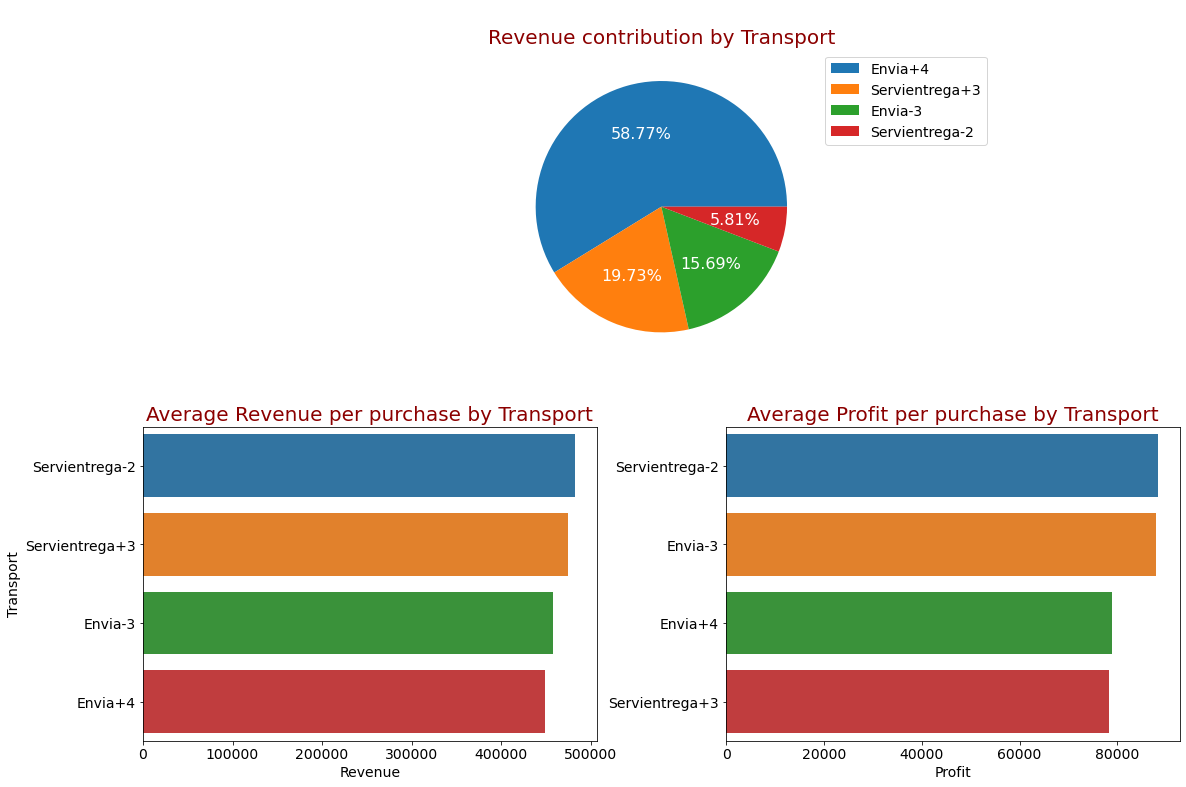

In [34]:
sales_profit('Transport')

In [35]:
## Inference :
## 1) "Envia+4" is the dominant Shipping mode of Sales but has the least contribution to average revenue and a low profit per purchase
## 2) "Servientrega-2" is the minority of the Shipping modes accounting for 6% but has the highest average revenue per purchase
## 3) "Servientrega-2" shipping mode has the maximum average profit per purchase

## Which Year provides high sales and profit?

Sales Contribution by Year

Twenty one    3120
Twenty        2500
Nineteen      1995
Eighteen      1880
Name: Year, dtype: int64


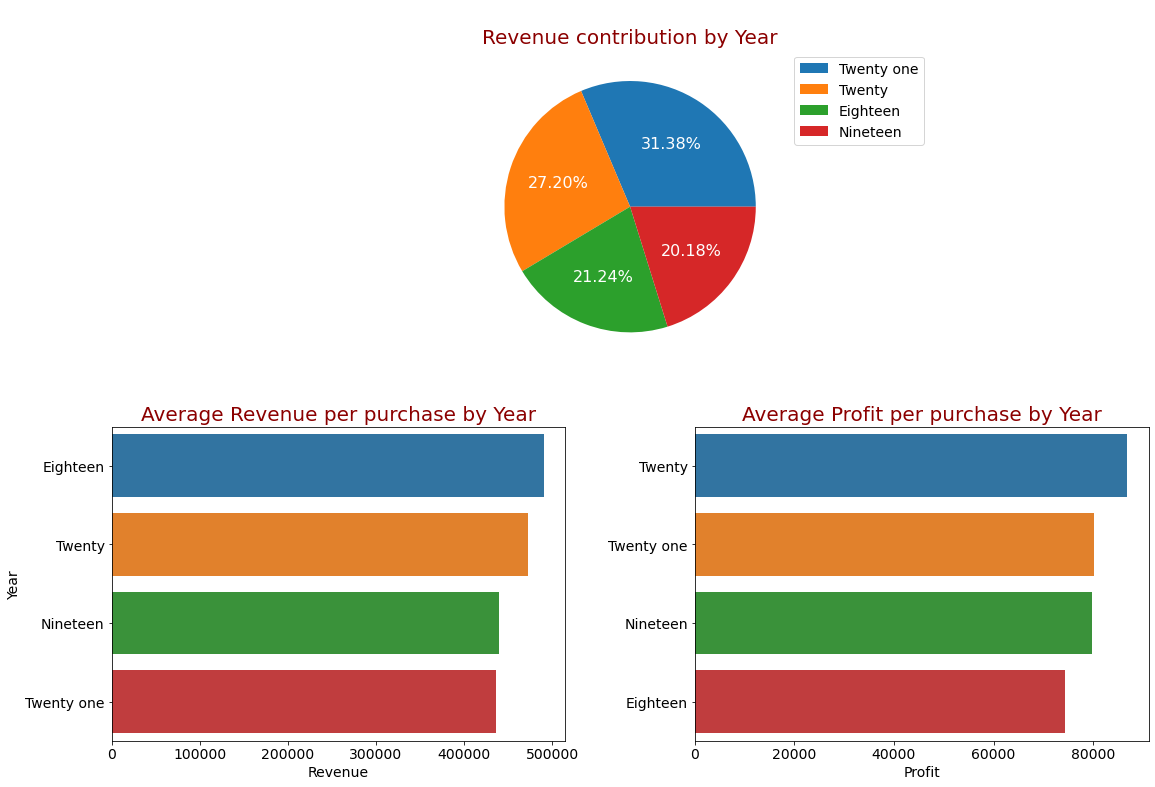

In [36]:
sales_profit('Year')

In [37]:
## Inference :
## Number of Sales and profit for 2020 and 2021 increased considerably compared to 2018 and 2019

## Which category yields high sales and profit?

Sales Contribution by Category

Trade Equipment    5696
Home appliances    2040
Industrial         1759
Name: Category, dtype: int64


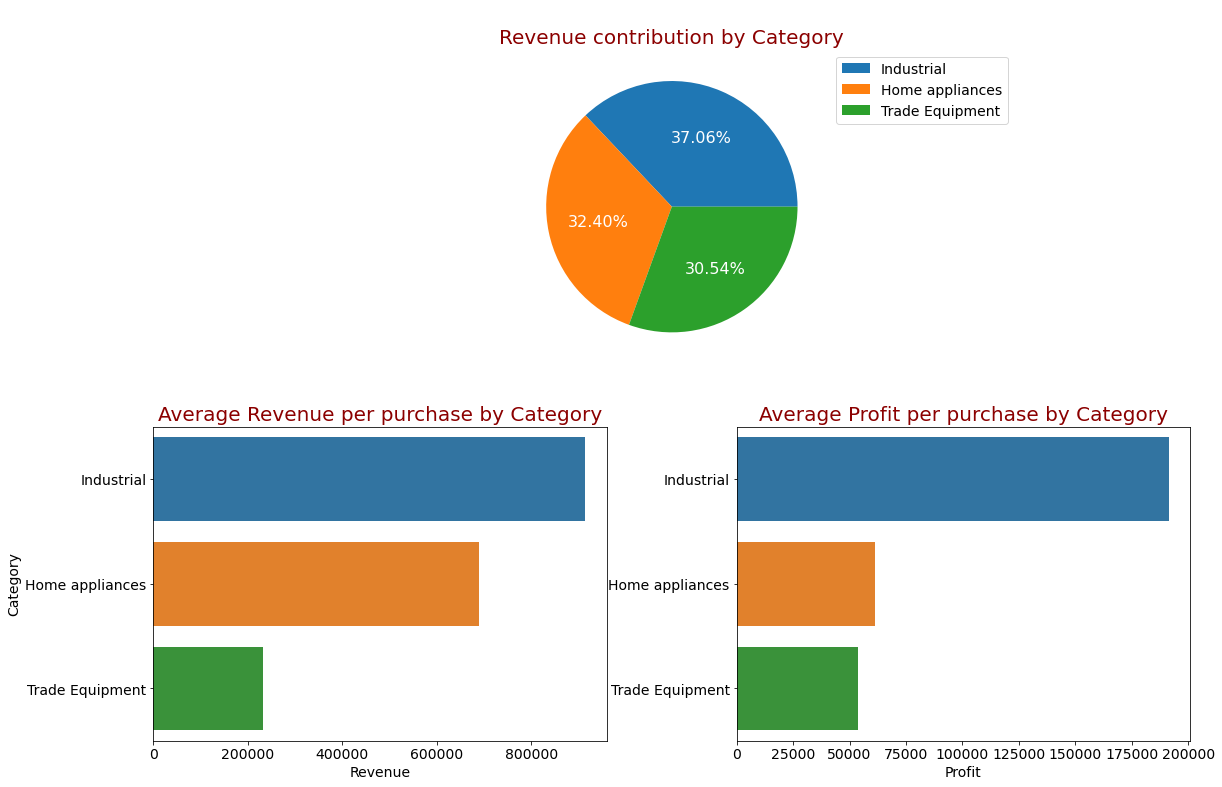

In [38]:
sales_profit('Category')

In [39]:
## Inference :
## 1) Revenue contribution is almost equally distributed between the categories
## 2) Industrial leads with higher avg sales and profit per purchase
## 3) Trade Equipment category purchases yields the least avg profit

## In Industrial, Which product yields high sales and profit?

Sales Contribution by Products

Drones        854
Printers      729
Laser Cut     113
Projectors     63
Name: Products, dtype: int64


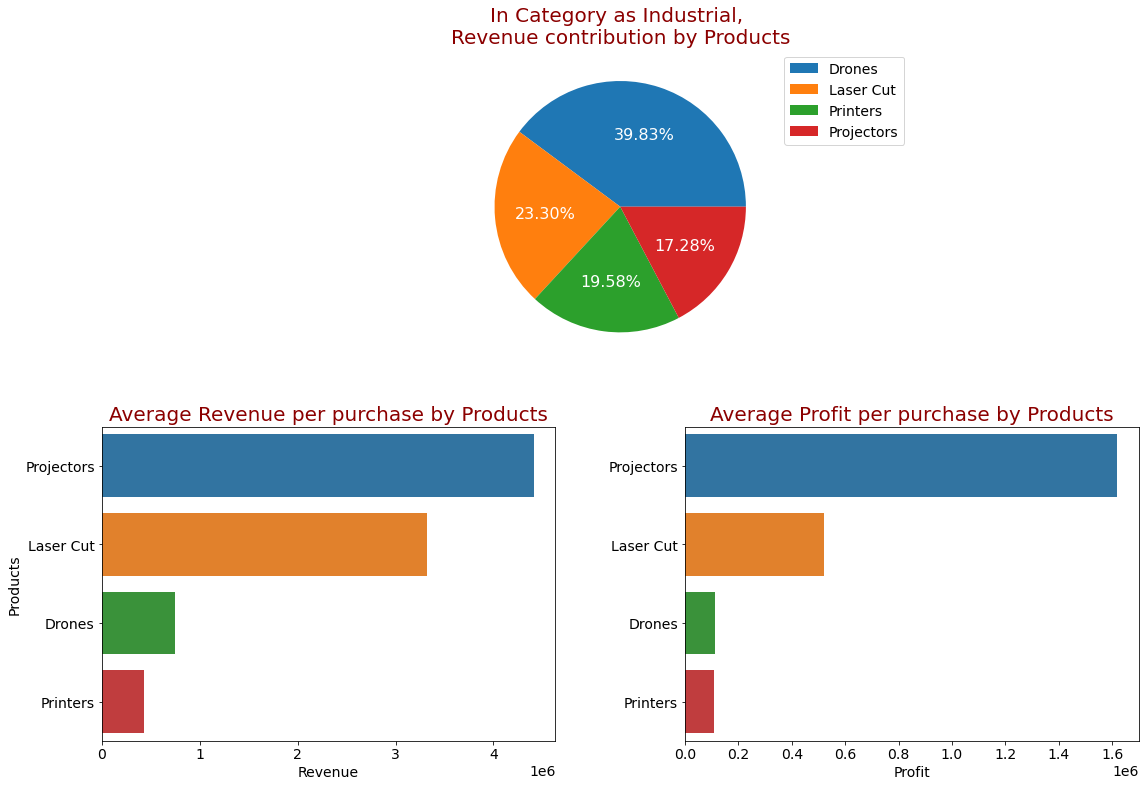

In [40]:
sales_profit(col='Products',filter_col='Category',filter_condition='Industrial')

In [41]:
## Inference :
## 1) Drones are the frequently purchased Industrial in the store
## 2) Surprisingly, Selling a unit of proyector gives almost 3 times more profit than selling a unit product from Corte laser 
##    and 16 times than other sub category in Industrial

## Conclusion

## Hence, EDA helped us in understanding the sales information and helped us infer business related inferences to take decitions

Important Inferences are:
    
1. In Orinoquia, the Home appliances business is in loss and it is a concern to be addressed
2. Company gets high revenue from popular cities such Bogota DC, Medellin and Cali, but small municipalities such as Tumaco and Quibdo shows promise with high average revenue and profit per purchase
3. Industrial products give the best average profit per purchase
4. In Industrial related products, Proyectors gives between 3x and 16x profit compared with any other sub category
5. Company should promote "Servientrega-2" shipping modes for better revenue and profit per purchase 